In [11]:
%pylab inline
from matplotlib.animation import FuncAnimation
import cartopy
import xarray as xr
import cmocean.cm as cmo
import cartopy.crs as ccrs

Populating the interactive namespace from numpy and matplotlib


### Load the ERA5 data

In [6]:
path = '/Volumes/GoogleDrive/My Drive/Projects/duplessis-2021-turbulent-heatflux/data/'
files = ['era5_airT_012019',
         'era5_airT_022019'
        ]

ds = xr.open_mfdataset(path+'era5_airT*.nc')

In [8]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 361, longitude: 1440, time: 1416)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 0.0 -0.25 -0.5 -0.75 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-01-01 ... 2019-02-28T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(744, 361, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-20 19:09:56 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

### Test the intial plot

This is what the plot is going to look like so good to refine this here and then run the loop

In [9]:
variable = (ds.t2m-273.15)

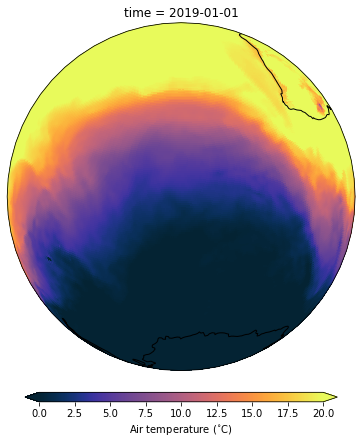

In [14]:
# Setup the initial plot
fig = figure(figsize=(8, 8))
ax  = fig.add_subplot(projection=ccrs.NearsidePerspective(satellite_height=2000000.0, 
                                                          central_longitude=0, 
                                                          central_latitude=-50
                                                         )
                     )

variable.sel(time=variable.time[0].values).plot(ax=ax, 
                                                vmin=0, vmax=20, 
                                                transform=ccrs.PlateCarree(),
                                                cmap=cmo.thermal,
                                                cbar_kwargs={'orientation': 'horizontal',
                                                             'aspect': 30,
                                                             'shrink': 0.7,
                                                             'pad': 0.05,
                                                             'label': 'Air temperature ($^{\circ}$C)'
                                                            },
                                               )

ax.coastlines(resolution='110m')

### Run full animation

In [ ]:
save_animation=True

# Setup the initial plot
fig = figure(figsize=(8, 8))
ax  = fig.add_subplot(projection=ccrs.NearsidePerspective(satellite_height=2000000.0, 
                                                          central_longitude=0, 
                                                          central_latitude=-55
                                                         )
                     )

ax.coastlines(resolution='110m')

# Select the variable & region of interest
# variable = (ds.t2m-273.15).isel(time=np.arange(150))
variable = (ds.t2m-273.15)

# Set up levels etc in this call
image = variable.sel(time=variable.time[0].values).plot(ax=ax, 
                                                vmin=-5, vmax=20, 
                                                transform=ccrs.PlateCarree(),
                                                cmap=cmo.thermal,
                                                cbar_kwargs={'orientation': 'horizontal',
                                                             'aspect': 30,
                                                             'shrink': 0.7,
                                                             'pad': 0.05,
                                                             'label': 'Air temperature ($^{\circ}$C)'
                                                            },
                                               )

ax.scatter(0, -54, s=100, marker='*', c='k', transform=ccrs.PlateCarree())

def update(t):
    # Update the plot for a specific time
    print(t)
    ax.set_title("time = %s"%t)
    image.set_array(variable.sel(time=t))
    return image,

# Run the animation, applying `update()` for each of the times in the variable
anim = FuncAnimation(fig, update, frames=variable.time.values, repeat=True)

# Save to file or display on screen
if save_animation:
    anim.save('t2m.mp4', fps=25, 
              extra_args=['-vcodec', 'libx264'],
              dpi=200,
             ) 